from google.colab import drive
drive.mount('/content/drive')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

It builds an image classifier using a `tf.keras.Sequential` model and load data using `tf.keras.preprocessing.image.ImageDataGenerator`. You will get some practical experience and develop intuition for the following concepts:

* Building _data input pipelines_ using the `tf.keras.preprocessing.image.ImageDataGenerator` class to efficiently work with data on disk to use with the model.
* _Overfitting_ —How to identify and prevent it.
* _Data augmentation_ and _dropout_ —Key techniques to fight overfitting in computer vision tasks to incorporate into the data pipeline and image classifier model.

This tutorial follows a basic machine learning workflow:

1. Examine and understand data
2. Build an input pipeline
3. Build the model
4. Train the model
5. Test the model
6. Improve the model and repeat the process

## Import packages

Let's start by importing the required packages. The <u>`os`</u> package is used to read files and directory structure, <u>`NumPy`</u> is used to convert python list to numpy array and to perform required matrix operations and <u>`matplotlib.pyplot`</u> to plot the graph and display images in the training and validation data.

Import Tensorflow and the Keras classes needed to construct our model.

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, GlobalAveragePooling2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

import os
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [0]:
# SET DIR DATASET AND IMAGE TRAIN DIR
import sys

if sys.platform.startswith('darwin'): 
  PATH = os.path.join(os.path.dirname('/Volumes/Dati/DL_Dataset/VOCdevkit/VOC2012/'), 'ImgForClass') 
  
elif sys.platform.startswith('linux'): 
  #PATH = os.path.join(os.path.dirname('/content/drive/My Drive/DataSets/VOCdevkit/'), 'VOC2012') 
  PATH = os.path.join(os.path.dirname('/content/drive/My Drive/DataSets/'), 'Intel_Image-Classification')
  LogsPath =  '/content/drive/My Drive/Logs/VGG16/'
  

elif sys.platform.startswith('win'):
  #PATH = os.path.join(os.path.dirname('E:\\DATAset\\VOCdevkit\\VOC2012\\'), 'ImgForClass')
  PATH = os.path.join(os.path.dirname('E:\\DATAset\\'), 'Intel_Image-Classification')

else: 
  PATH = os.path.join(os.path.dirname('/content/drive/My Drive/DataSets'), 'Intel_Image-Classification')
  LogsPath =  '/content/drive'

print('os name is %s; path = %s' % (sys.platform, PATH))

train_dir = os.path.join(PATH, 'seg_train')
# validation_dir = os.path.join(PATH, 'VAL')

print('train dir is : ', train_dir)

os name is linux; path = /content/drive/My Drive/DataSets/Intel_Image-Classification
train dir is :  /content/drive/My Drive/DataSets/Intel_Image-Classification/seg_train


The dataset has the following directory structure:

<pre>
<b>ImgForClass(PascalVOC2012)</b>
|__ <b>TRAIN</b>
    |______ <b>aeroplane</b>: [2008_000033.jpg, 2008_000037.jpg, 2008_000151.jpg ....]
    |______ <b>bicycle</b>: [2008_000036.jpg, 2008_000191.jpg, 2008_000196.jpg ...]
    |______ <b>bird</b>: [2008_000095.jpg, 2008_000097.jpg, 2008_000103.jpg ...]
    |______ <b>....</b>: [xxxx_xxxxxx.jpg, ...]
|__ <b>VAL</b>
    |______ <b>aeroplane</b>: [2008_000021.jpg, 2008_000064.jpg, 2008_000251.jpg ....]
    |______ <b>bicycle</b>: [2008_000090.jpg, 2008_000133.jpg, 2008_000194.jpg ...]
    |______ <b>bird</b>: [2008_000054.jpg, 2008_000123.jpg, 2008_000134.jpg ...]
    |______ <b>....</b>: [xxxx_xxxxxx.jpg, ...]
</pre>

After extracting its contents, assign variables with the proper file path for the training and validation set.

In [0]:
for i in os.listdir( train_dir ):    # and os.listdir( validation_dir )
    train_i_dir = os.path.join(train_dir, i)
    # validation_i_dir = os.path.join(validation_dir, i)
    # print('DEBUG stampa le dir di train : 'train_i_dir)
    # print('DEBUG stampa le dir di validation : 'validation_i_dir)

### Understand the data

Let's look at how many cats and dogs images are in the training (and validation directory):

In [0]:
total_train = 0
# total_validation = 0

classVOC = [x for x in os.listdir( train_dir )]  
print(classVOC)

for x in classVOC:
    if x != '.DS_Store':

        os.path.join(train_dir, x)
        # os.path.join(validation_dir, x)
        print(len(os.listdir(os.path.join(train_dir, x))))

        num_x_train = len(os.listdir(os.path.join(train_dir, x)))
        total_train += num_x_train
        # print('total training %s images: %d' % (x, num_x_train))

        # num_x_validation = len(os.listdir(os.path.join(validation_dir, x)))
        # total_validation += num_x_validation
        # print('total validation %s images: %d' % (x, num_x_validation))

print("----------")
print("Total training images:", total_train)
# print("Total validation images:", total_validation)

['buildings', 'glacier', 'forest', 'mountain', 'sea', 'street']
2191
2404
2271
2512
2274
2382
----------
Total training images: 14034


In [0]:
os.getcwd()

'/content'

For convenience, set up variables to use while pre-processing the dataset and training the network.

In [0]:
#CONSTANTS
batch_size = 32
epochs = 150
IMG_HEIGHT = 224
IMG_WIDTH = 224

## Data preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the `ImageDataGenerator` class provided by `tf.keras`. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3) # Generator for our training data
# validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

After defining the generators for training and validation images, the `flow_from_directory` method load images from the disk, applies rescaling, and resizes the images into the required dimensions.

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical',
                                                           subset='training')
class_dict = train_data_gen.class_indices
# class_dict
#train_data_gen[1]

Found 9826 images belonging to 6 classes.


In [0]:
val_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=train_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical',
                                                              subset='validation')


Found 4208 images belonging to 6 classes.


### Visualize training images

Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with `matplotlib`.

In [0]:
sample_training_images, labels = next(train_data_gen)

The `next` function returns a batch from the dataset. The return value of `next` function is in form of `(x_train, y_train)` where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax, label in zip( images_arr, axes, labels):
        ax.imshow(img)
        ax.axis('on')
        title = list(class_dict.keys())[list(class_dict.values()).index(np.argmax(label))]
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

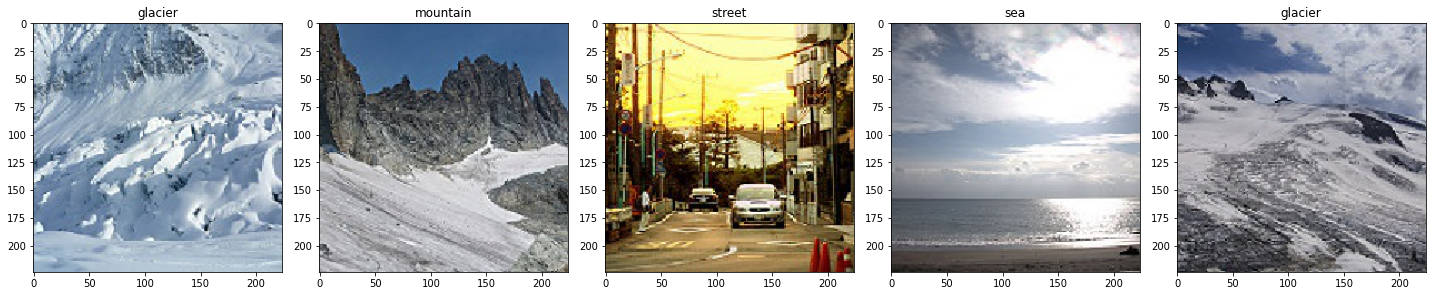

In [0]:
plotImages(sample_training_images[:5], labels[:5])

In [0]:
### Create "Callbacks" for Tensorboard monitor 

In [0]:
###Add parameters to control

In [0]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 10),
    tf.keras.callbacks.ModelCheckpoint(filepath = LogsPath + "VGGintel_model.h5", monitor = 'val_loss', save_best_only = True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 2),
    tf.keras.callbacks.TensorBoard(log_dir = LogsPath, histogram_freq = 1, embeddings_freq = 1)
]

## Create the model

The model consists of ... VGG16

In [0]:
base_model = VGG16(include_top=True, weights=None, input_tensor=None, input_shape=None, pooling=None, classes=6)

# model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

model = Sequential()
model.add(Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output))
model.add(Dropout(0.5))
model.add(Conv2D(1024, 3, activation = 'relu'))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(6, activation="softmax"))


### Compile the model

For this tutorial, choose the *ADAM* optimizer and *binary cross entropy* loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument.

In [0]:
tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

tf.keras.optimizers.SGD(
    learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True, name='SGD')

tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model summary

View all the layers of the network using the model's `summary` method:

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 14, 14, 512)       14714688  
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 12, 1024)      4719616   
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 1024)      0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6150      
Total params: 19,440,454
Trainable params: 19,440,454
Non-trainable params: 0
____________________________________________

### Train the model

Use the `fit_generator` method of the `ImageDataGenerator` class to train the network.

In [0]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    callbacks = callbacks_list,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size
)
for key in history.history:
    print(key)

Epoch 1/150
307/307 [==============================] - 468s 2s/step - loss: 1.2789 - accuracy: 0.4607 - val_loss: 0.9847 - val_accuracy: 0.5792 - lr: 1.0000e-04
Epoch 2/150
307/307 [==============================] - 88s 286ms/step - loss: 0.9574 - accuracy: 0.6091 - val_loss: 0.8508 - val_accuracy: 0.6667 - lr: 1.0000e-04
Epoch 3/150
307/307 [==============================] - 88s 286ms/step - loss: 0.8247 - accuracy: 0.6755 - val_loss: 0.7232 - val_accuracy: 0.7152 - lr: 1.0000e-04
Epoch 4/150
307/307 [==============================] - 87s 284ms/step - loss: 0.7019 - accuracy: 0.7409 - val_loss: 0.7037 - val_accuracy: 0.7340 - lr: 1.0000e-04
Epoch 5/150
307/307 [==============================] - 88s 286ms/step - loss: 0.6206 - accuracy: 0.7716 - val_loss: 0.6050 - val_accuracy: 0.7772 - lr: 1.0000e-04
Epoch 6/150
307/307 [==============================] - 87s 285ms/step - loss: 0.5880 - accuracy: 0.7875 - val_loss: 0.5524 - val_accuracy: 0.8042 - lr: 1.0000e-04
Epoch 7/150
307/307 [===

### Visualize training results

Now visualize the results after training the network.

ValueError: ignored

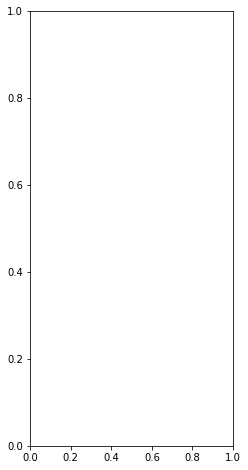

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around **25%** accuracy on the validation set.

Let's look at what went wrong and try to increase overall performance of the model.

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 25% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of *overfitting*.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *dropout* to our model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. One way to fix this problem is to augment the dataset so that it has a sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.

Implement this in `tf.keras` using the `ImageDataGenerator` class. Pass  different transformations to the dataset and it will take care of applying it during the training process.

### Augment and visualize data

Begin by applying random horizontal flip augmentation to the dataset and see how individual images look like after the transformation.

### Apply horizontal flip

Pass `horizontal_flip` as an argument to the `ImageDataGenerator` class and set it to `True` to apply this augmentation.

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

class_dict = train_data_gen.class_indices

Found 14034 images belonging to 6 classes.


Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times.

In [0]:
augmented_images, labels = [train_data_gen[0][0][0] for i in range(5)], [train_data_gen[0][1] for i in range(5)]

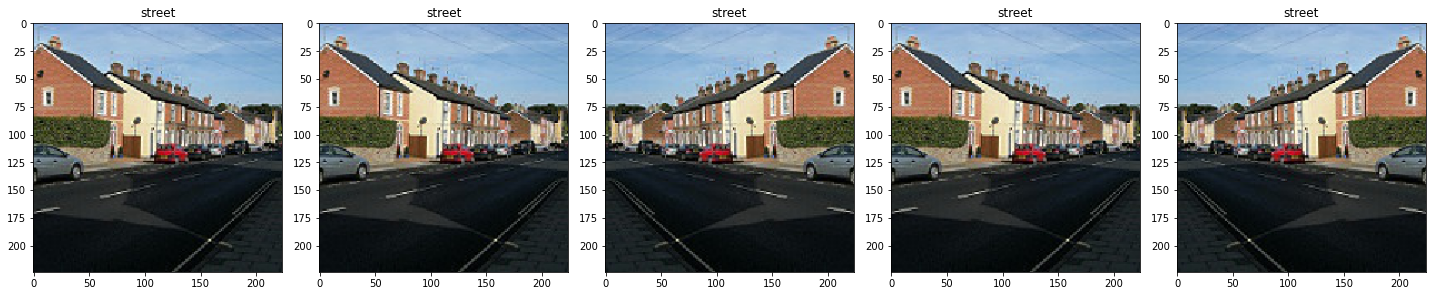

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images,labels)

### Randomly rotate the image

Let's take a look at a different augmentation called rotation and apply 45 degrees of rotation randomly to the training examples.

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images, labels = [train_data_gen[0][0][0] for i in range(5)], [train_data_gen[0][1] for i in range(5)]

Found 14034 images belonging to 6 classes.


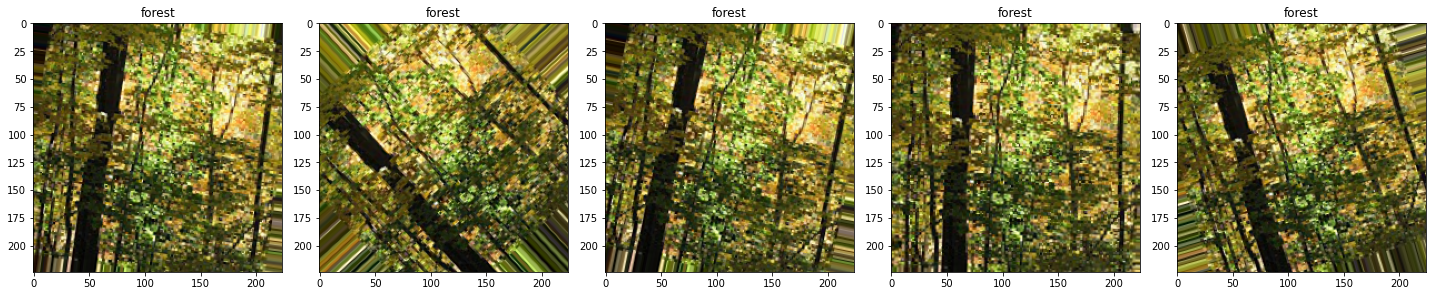

In [0]:
plotImages(augmented_images, labels)

### Apply zoom augmentation

Apply a zoom augmentation to the dataset to zoom images up to 50% randomly.

In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images, labels = [train_data_gen[0][0][0] for i in range(5)], [train_data_gen[0][1] for i in range(5)]

Found 14034 images belonging to 6 classes.


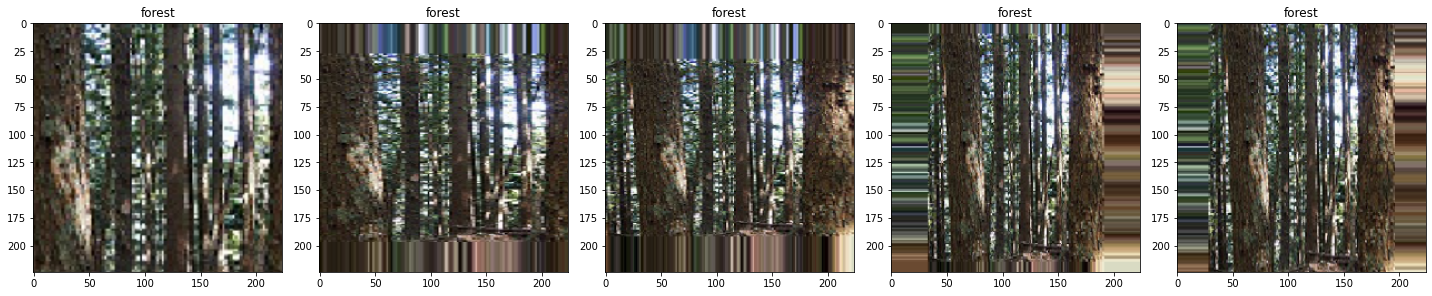

In [0]:
plotImages(augmented_images, labels)

### Put it all together

Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images.

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5,
                    validation_split=0.3
                    )

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical',
                                                     subset='training')

Found 9826 images belonging to 6 classes.


Visualize how a single image would look five different times when passing these augmentations randomly to the dataset.

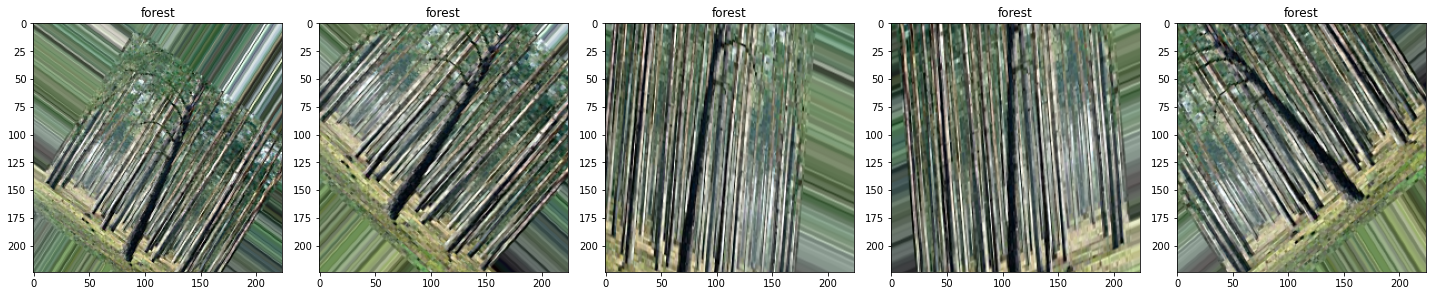

In [0]:
augmented_images, labels = [train_data_gen[0][0][0] for i in range(5)], [train_data_gen[0][1] for i in range(5)]
plotImages(augmented_images, labels)

### Create validation data generator

Generally, only apply data augmentation to the training examples. In this case, only rescale the validation images and convert them into batches using `ImageDataGenerator`.

In [0]:
# image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
val_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                 directory=train_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical',
                                                 subset='validation')

Found 4208 images belonging to 6 classes.


## Dropout

Another technique to reduce overfitting is to introduce *dropout* to the network. It is a form of *regularization* that forces the weights in the network to take only small values, which makes the distribution of weight values more regular and the network can reduce overfitting on small training examples. Dropout is one of the regularization technique used in this tutorial

When you apply dropout to a layer it randomly drops out (set to zero) number of output units from the applied layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

When appling 0.1 dropout to a certain layer, it randomly kills 10% of the output units in each training epoch.

Create a network architecture with this new dropout feature and apply it to different convolutions and fully-connected layers.

## Creating a new network with Dropouts

Here, you apply dropout to first and last max pool layers. Applying dropout will randomly set 20% of the neurons to zero during each training epoch. This helps to avoid overfitting on the training dataset.

In [0]:
from tensorflow.keras.layers import Dropout

model_new = Sequential()
model_new.add(Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output))
model_new.add(Dropout(0.4))
model_new.add(Conv2D(1024, 3, activation = 'relu'))
model_new.add(GlobalAveragePooling2D())
model_new.add(Dense(6, activation="softmax"))


### Compile the model

After introducing dropouts to the network, compile the model and view the layers summary.

In [0]:
model_new = model
model_new.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 14, 14, 512)       14714688  
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 12, 1024)      4719616   
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 1024)      0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6150      
Total params: 19,440,454
Trainable params: 19,440,454
Non-trainable params: 0
____________________________________________

### Train the model

After successfully introducing data augmentations to the training examples and adding dropouts to the network, train this new network:

In [0]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    callbacks = callbacks_list,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size
)

Epoch 1/150
307/307 [==============================] - 195s 636ms/step - loss: 0.8434 - accuracy: 0.7044 - val_loss: 0.7175 - val_accuracy: 0.7369 - lr: 1.0000e-04
Epoch 2/150
307/307 [==============================] - 191s 624ms/step - loss: 0.6628 - accuracy: 0.7644 - val_loss: 0.6735 - val_accuracy: 0.7600 - lr: 1.0000e-04
Epoch 3/150
307/307 [==============================] - 189s 617ms/step - loss: 0.6081 - accuracy: 0.7824 - val_loss: 0.6329 - val_accuracy: 0.7786 - lr: 1.0000e-04
Epoch 4/150
307/307 [==============================] - 189s 615ms/step - loss: 0.5936 - accuracy: 0.7865 - val_loss: 0.6040 - val_accuracy: 0.7820 - lr: 1.0000e-04
Epoch 5/150
307/307 [==============================] - 189s 617ms/step - loss: 0.5579 - accuracy: 0.7998 - val_loss: 0.6113 - val_accuracy: 0.7762 - lr: 1.0000e-04
Epoch 6/150
307/307 [==============================] - 189s 616ms/step - loss: 0.5426 - accuracy: 0.8029 - val_loss: 0.5566 - val_accuracy: 0.8034 - lr: 1.0000e-04
Epoch 7/150
307/

### Visualize the model

In [0]:
print('accuracy'])

TypeError: ignored

Visualize the new model after training, you can see that there is significantly less overfitting than before. The accuracy should go up after training the model for more epochs.

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()